In [1]:
#%% imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from popy.io_tools import get_behavior, load_metadata
import popy.config as cfg

# file access paths
base_path = cfg.PROJECT_PATH_LOCAL

In [2]:
##% plotting
def plot_mean_block_lens(df_concat):
    # histogram of block lengths

    mean_block_lens = {'ka': [], 'po': []}

    for (monkey, session), subdf in df_concat.groupby(['monkey', 'session']):
        mean_block_lens[monkey].append(subdf.groupby('block_id').size().values.mean())
        
    plt.figure(figsize=(5, 3))
    plt.hist(mean_block_lens['ka'], bins=np.arange(25, 45, 1), alpha=0.5, label='ka')
    plt.hist(mean_block_lens['po'], bins=np.arange(25, 45, 1), alpha=0.5, label='po')
    plt.xlabel('Block length')
    plt.ylabel('Count')
    plt.title('Block length distribution per monkey, all sessions')
    plt.axvline(35, color='red', label='cutoff')
    plt.legend()
    plt.show()

    print(f"Long sessions ka: {np.count_nonzero(np.array(mean_block_lens['ka']) > 35)}")
    print(f"Long sessions po: {np.count_nonzero(np.array(mean_block_lens['po']) > 35)}")
    print(f"Short sessions ka: {np.count_nonzero(np.array(mean_block_lens['ka']) <= 35)}")
    print(f"Short sessions po: {np.count_nonzero(np.array(mean_block_lens['po']) <= 35)}")

def plot_n_blocks(df_concat):
    # histoglam of number of block per sessions per monkey (in long sessions)

    n_blocks = {'ka': [], 'po': []}

    for (monkey, session), subdf in df_concat.groupby(['monkey', 'session']):
        n_blocks[monkey].append(subdf['block_id'].max())

    plt.figure(figsize=(5, 3))
    plt.hist(n_blocks['ka'], bins=np.arange(0, 13, 1), alpha=0.5, label='ka')
    plt.hist(n_blocks['po'], bins=np.arange(0, 13, 1), alpha=0.5, label='po')
    plt.xlabel('Number of blocks')
    plt.ylabel('Count')
    plt.title('Number of blocks per session (blocklen>35 sessions only)')
    plt.legend()
    plt.show()

# Process all session behav data

This code reformats the raw behav files to our standard pandas df

In [3]:
# load all session metadata
session_metadata = load_metadata()
session_metadata

,monkey,recording_day,session,depth,session_of_day,block_len_valid,n_blocks,position_MCC,coords_MCC,position_LPFC,coords_LPFC,LPFC_subregion,MCC_spikes_exist,MCC_file_name,LPFC_spikes_exist,LPFC_file_name,behav_file_name,interrupted_trials,session_complete
0,ka,2020-05-23,230520,7042,1,True,10.0,gm,"(3, 3)",ki,"(-1, -1)",vLPFC,True,spk_dataset_MCC_ka230520_001.txt,False,NaN,ka230520_gmki_7042001.mat,1.0,True
1,ka,2020-06-05,050620,6914,2,True,7.0,ej,"(5, 0)",jf,"(0, -4)",vLPFC,True,spk_dataset_MCC_ka050620_002.txt,True,spk_dataset_LPFC_ka050620_002.txt,ka050620_ejjf_6914002.mat,0.0,True
2,ka,2020-06-08,080620,7621,3,True,9.0,fn,"(4, 4)",kh,"(-1, -2)",vLPFC,True,spk_dataset_MCC_ka080620_003.txt,True,spk_dataset_LPFC_ka080620_003.txt,ka080620_fnkh_7621003.mat,1.0,False
3,ka,2020-06-10,100620,7639,1,True,10.0,el,"(5, 2)",lg,"(-2, -3)",vLPFC,True,spk_dataset_MCC_ka100620_001.txt,True,spk_dataset_LPFC_ka100620_001.txt,ka100620_ellg_7639001.mat,0.0,True
4,ka,2020-06-16,160620,8565,1,True,10.0,go,"(3, 5)",lj,"(-2, 0)",vLPFC,True,spk_dataset_MCC_ka160620_001.txt,True,spk_dataset_LPFC_ka160620_001.txt,ka160620_golj_8565001.mat,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,po,2022-07-20,200722,5782,2,True,9.0,di,"(6, -1)",le,"(-2, -5)",vLPFC,True,spk_dataset_MCC_po200722_002.txt,True,spk_dataset_LPFC_po200722_002.txt,po200722_dile_5782002.mat,0.0,True
125,po,2022-07-28,280722,5869,2,True,11.0,gh,"(3, -2)",pg,"(-6, -3)",vLPFC,True,spk_dataset_MCC_po280722_002.txt,True,spk_dataset_LPFC_po280722_002.txt,po280722_ghpg_5869002.mat,1.0,True
126,po,2022-08-09,090822,5184,3,True,7.0,gp,"(3, 6)",ne,"(-4, -5)",vLPFC,True,spk_dataset_MCC_po090822_003.txt,True,spk_dataset_LPFC_po090822_003.txt,po090822_gpne_5184003.mat,0.0,True
127,po,2022-08-31,310822,5522,1,True,10.0,gj,"(3, 0)",ld,"(-2, -6)",vLPFC,True,spk_dataset_MCC_po310822_001.txt,True,spk_dataset_LPFC_po310822_001.txt,po310822_gjld_5522001.mat,2.0,True


# Process raw behav data and concatenate into one df

In [4]:
# process all sessions
log = []  # log errors here
df_long = pd.DataFrame()  # init dataframe
df_short = pd.DataFrame()  # init dataframe

for index, row in session_metadata.iterrows():
    monkey = row['monkey']
    session = row['session']
    block_len_valid = row['block_len_valid']

    try:
        session_data = get_behavior(monkey, session)  # load raw data and preprocess it
        if block_len_valid:
            df_long = pd.concat([df_long, session_data], ignore_index=True)  # collect all sessions in one dataframe
        else:
            df_short = pd.concat([df_short, session_data], ignore_index=True)
    except:
        log.append(f"Error processing {monkey} {session}")


# Split sessions' data to block len 40 and 25 sessions
Split over or below 35 trials pre block on average

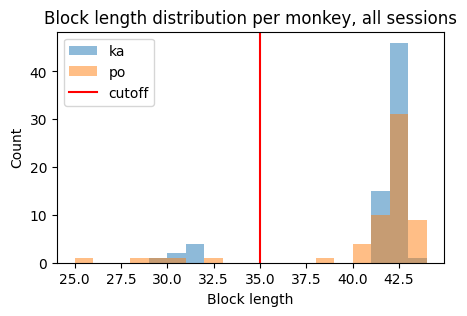

Long sessions ka: 62
Long sessions po: 55
Short sessions ka: 7
Short sessions po: 5


In [5]:
# lets see the distribution of sessions' mean block lengths
plot_mean_block_lens(pd.concat([df_short, df_long], ignore_index=True))

# Print some stats

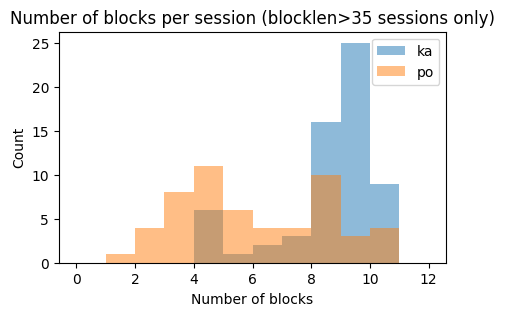

In [6]:
# what hom many block per session do we have in the long sessions?
plot_n_blocks(df_long)